In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
#Task-1 Reading the dataset and Performing Data preprocessing
df=pd.read_csv("drug200.csv")
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [37]:
# Determining the shape of the Dataset

df.shape

(200, 6)

In [38]:
# Determining unique values of suitable columns

df["BP"].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [39]:
df["Cholesterol"].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [40]:
df["Drug"].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [41]:
#Checking for null values

df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<Axes: >

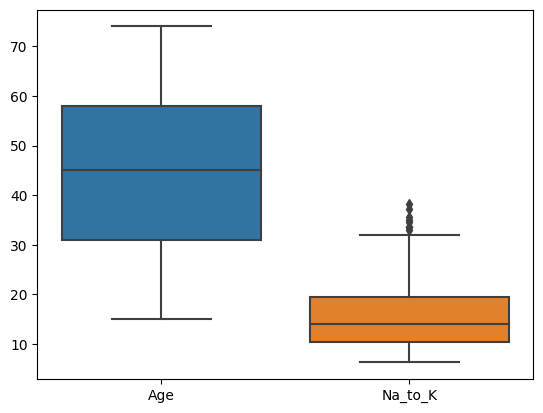

In [42]:
sns.boxplot(df)

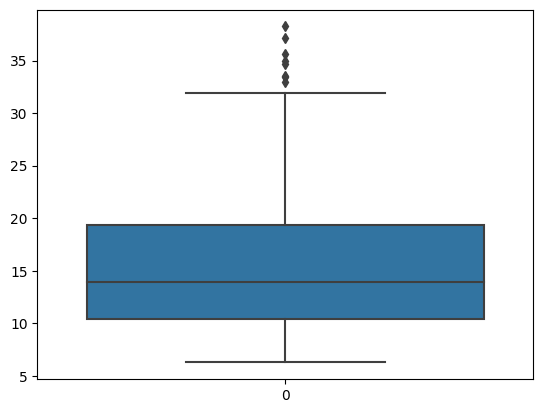

In [43]:
sns.boxplot(df.Na_to_K)
q1 = df.Na_to_K.quantile(.25)
q3 = df.Na_to_K.quantile(.75)


In [44]:
IQR = q3 - q1
IQR

8.9345

In [45]:
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR

In [46]:
df.median()

<ipython-input-46-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Age        45.0000
Na_to_K    13.9365
dtype: float64

<Axes: >

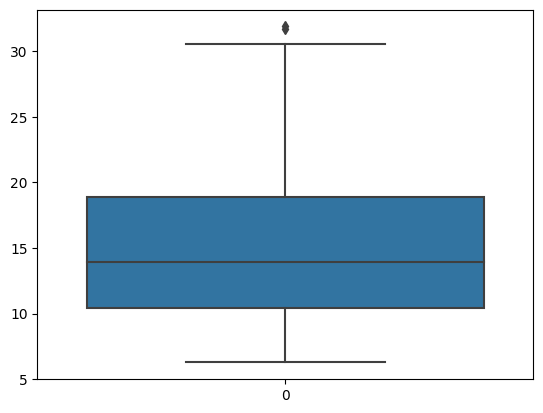

In [47]:
df['Na_to_K'] =np.where(df['Na_to_K']>upper_limit,13.9365,df['Na_to_K'])
sns.boxplot(df.Na_to_K)

In [48]:
x=df.iloc[:,0:5]
y=df.iloc[:,5]

x.head(),y.head()

(   Age Sex      BP Cholesterol  Na_to_K
 0   23   F    HIGH        HIGH   25.355
 1   47   M     LOW        HIGH   13.093
 2   47   M     LOW        HIGH   10.114
 3   28   F  NORMAL        HIGH    7.798
 4   61   F     LOW        HIGH   18.043,
 0    DrugY
 1    drugC
 2    drugC
 3    drugX
 4    DrugY
 Name: Drug, dtype: object)

In [51]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

le = LabelEncoder() # initialize the lib

df['Sex']= le.fit_transform(df['Sex'])
df['BP']= le.fit_transform(df['BP'])
df['Cholesterol']= le.fit_transform(df['Cholesterol'])
df['Drug']= le.fit_transform(df['Drug'])

In [60]:
df['BP']

0      0
1      1
2      1
3      2
4      1
      ..
195    1
196    1
197    2
198    2
199    1
Name: BP, Length: 200, dtype: int64

In [53]:
x=df.iloc[:,0:5]
y=df.iloc[:,5]

x.head(),y.head()

(   Age  Sex  BP  Cholesterol  Na_to_K
 0   23    0   0            0   25.355
 1   47    1   1            0   13.093
 2   47    1   1            0   10.114
 3   28    0   2            0    7.798
 4   61    0   1            0   18.043,
 0    0
 1    3
 2    3
 3    4
 4    0
 Name: Drug, dtype: int64)

In [121]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=7)
xtrain,ytrain

(     Age  Sex  BP  Cholesterol  Na_to_K
 88    37    0   0            1   23.091
 58    60    1   2            1   10.091
 113   65    0   1            1   13.769
 149   22    1   1            0    8.151
 36    32    1   0            1    9.445
 ..   ...  ...  ..          ...      ...
 151   68    1   0            0   11.009
 67    17    1   2            1   10.832
 25    28    0   0            1   18.809
 196   16    1   1            0   12.006
 175   73    0   0            0   18.348
 
 [140 rows x 5 columns],
 88     0
 58     4
 113    4
 149    3
 36     1
       ..
 151    2
 67     4
 25     0
 196    3
 175    0
 Name: Drug, Length: 140, dtype: int64)

In [192]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(8,input_dim=5,activation="relu"))

model.add(Dense(10,activation="relu"))

model.add(Dense(32,activation="relu"))

model.add(Dense(64,activation="relu"))

model.add(Dense(5,activation="softmax"))


In [193]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [197]:
model.fit(xtrain,ytrain,batch_size=32,epochs=20,validation_data=(xtest,ytest))

Epoch 1/20
5/5 [==============================] - 0s 21ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.8347 - val_accuracy: 0.8667
Epoch 2/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.7200 - val_accuracy: 0.8667
Epoch 3/20
5/5 [==============================] - 0s 15ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.7994 - val_accuracy: 0.8667
Epoch 4/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.7973 - val_accuracy: 0.8667
Epoch 5/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.7136 - val_accuracy: 0.8667
Epoch 6/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.7915 - val_accuracy: 0.8667
Epoch 7/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.7898 - val_accuracy: 0.8667
Epoch 8/20
5/5 [===========

In [198]:
y_preds=model.predict(xtest)

2/2 [==============================] - 0s 3ms/step


In [199]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_85 (Dense)            (None, 8)                 48        
                                                                 
 dense_86 (Dense)            (None, 10)                90        
                                                                 
 dense_87 (Dense)            (None, 32)                352       
                                                                 
 dense_88 (Dense)            (None, 64)                2112      
                                                                 
 dense_89 (Dense)            (None, 5)                 325       
                                                                 
Total params: 2,927
Trainable params: 2,927
Non-trainable params: 0
_________________________________________________________________


In [200]:
y_preds

array([[6.9118259e-03, 1.9451945e-31, 4.3846927e-12, 5.4998896e-08,
        9.9308807e-01],
       [9.9999994e-01, 0.0000000e+00, 1.1598851e-19, 1.1641669e-12,
        3.6792218e-20],
       [9.9999994e-01, 0.0000000e+00, 9.5970614e-27, 8.4544423e-17,
        1.2396990e-26],
       [9.9999994e-01, 4.2620114e-15, 1.3914996e-10, 2.5509246e-09,
        2.3104244e-18],
       [5.1721750e-06, 2.9827594e-15, 2.4946723e-03, 9.9714220e-01,
        3.5805299e-04],
       [1.2119595e-07, 1.0752850e-09, 2.0462081e-04, 9.9878609e-01,
        1.0090374e-03],
       [9.9999863e-01, 4.4675561e-12, 2.3837845e-07, 1.0697308e-06,
        2.0173623e-14],
       [9.2770672e-01, 4.8006667e-16, 2.9757344e-05, 7.2263166e-02,
        3.7736027e-07],
       [2.7465327e-03, 9.9725300e-01, 4.2213776e-07, 2.6438782e-09,
        1.0962624e-16],
       [2.0145615e-12, 1.5747508e-14, 6.0990444e-09, 1.6704573e-04,
        9.9983287e-01],
       [3.6582057e-13, 8.0526490e-07, 9.9993271e-01, 6.6372078e-05,
        1.24

In [201]:
model.evaluate(xtest,ytest,verbose=0)

[0.8653534054756165, 0.8666666746139526]